# Uber Fares

Dataset je úspešne ukradnutý z [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/data). Sťahovať ho môžete [odtiaľto](data/uber.csv).

![obrazok](images/uber.jpg)

## Načítanie datasetu

In [1]:
import pandas as pd

df = pd.read_csv('data/uber.csv.gz', index_col=0, parse_dates=['pickup_datetime'])

okrem načítania:
* premenujeme niekoľko stĺpcov
* pretypujeme stĺpce na menšie údajové typy
* odstránime duplicitný stĺpec
* odstránime riadky, ktoré nemajú hodnotu

In [2]:
# cleanup a priprava
df.drop(columns=['key'], inplace=True)
df.rename(
    columns={
        'passenger_count': 'passengers',
        'fare_amount': 'fare',
        'pickup_datetime': 'dt'
    },
    inplace=True
)
df.dropna(inplace=True)

In [3]:
# zmazanie riadkov, kde cena je menej ako 0
filter_fares = df['fare'] < 0
# df = df.loc[ ~filter_fares, : ]
df.drop(df.loc[ filter_fares ].index, inplace=True)

In [4]:
# zmazanie riadkov, kde pocet pasazierov je vacsi ako 10
filter_passengers = df['passengers'] > 10
df.drop(df.loc[ filter_passengers ].index, inplace=True)

In [5]:
# zmazanie riadkov, kde longitude nie je v rozmedzi <-180, 180>
filter_longitude = (df['pickup_longitude'] <= -180) | (df['pickup_longitude'] >= 180) | (df['dropoff_longitude'] <= -180) | (df['dropoff_longitude'] >= 180)
df.drop(df.loc[ filter_longitude ].index, inplace=True)

In [6]:
# zmazanie riadkov, kde latitude nie je v rozmedzi <-90, 90>
# -180 < df['pickup_longitude'] < 180
filter_latitude = (df['pickup_latitude'] <= -90) | (df['pickup_latitude'] >= 90) | (df['dropoff_latitude'] <= -90) | (df['dropoff_latitude'] >= 90)
df.drop(df.loc[ filter_latitude ].index, inplace=True)

In [7]:
# pretypovanie stĺpcov
df['passengers'] = df['passengers'].astype('uint8')
df['fare'] = df['fare'].astype('float32')
df['pickup_latitude'] = df['pickup_latitude'].astype('float32')
df['pickup_longitude'] = df['pickup_longitude'].astype('float32')
df['dropoff_latitude'] = df['dropoff_latitude'].astype('float32')
df['dropoff_longitude'] = df['dropoff_longitude'].astype('float32')

In [8]:
# ulozim upravene data
df.to_csv('data/uber-clean.csv')

## Prehľad

In [9]:
# pohlad na vlastnosti datasetu
df.describe()

,fare,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers
count,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000
mean,11.362259,-72.501656,39.917862,-72.511841,39.922157,1.683471
std,9.897235,10.450417,6.130682,10.411389,6.117288,1.306938
min,0.000000,-93.824669,-74.015518,-75.458977,-74.015747,0.000000
25%,6.000000,-73.992065,40.734791,-73.991409,40.733826,1.000000
50%,8.500000,-73.981819,40.752590,-73.980095,40.753040,1.000000
75%,12.500000,-73.967155,40.767159,-73.963661,40.768002,2.000000
max,499.000000,40.808426,48.018761,40.831932,45.031597,6.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199969 entries, 24238194 to 11951496
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare               199969 non-null  float32            
 1   dt                 199969 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199969 non-null  float32            
 3   pickup_latitude    199969 non-null  float32            
 4   dropoff_longitude  199969 non-null  float32            
 5   dropoff_latitude   199969 non-null  float32            
 6   passengers         199969 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 7.1 MB


In [11]:
df

,fare,dt,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994354,40.728226,-73.994713,40.750324,1
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740768,-73.962563,40.772648,1
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976128,40.790844,-73.965317,40.803349,3
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925026,40.744083,-73.973083,40.761246,5
...,...,...,...,...,...,...,...
42598914,3.0,2012-10-28 10:49:00+00:00,-73.987045,40.739368,-73.986526,40.740295,1
16382965,7.5,2014-03-14 01:09:00+00:00,-73.984718,40.736835,-74.006676,40.739620,1
27804658,30.9,2009-06-29 00:42:00+00:00,-73.986015,40.756489,-73.858955,40.692589,2
20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


## Otázky

1. Koľko peňazí sme zarobili za dané obdobie?

In [12]:
# tak kolko?
df[ 'fare' ].sum()

2272099.5

2. Koľko peňazí sme zarobili za jednotlivé roky?
   Poznámka: tu môžete nakresliť aj pekný obrázok

<Axes: title={'center': 'Peňeži za roky'}, xlabel='rok', ylabel='peňeži'>

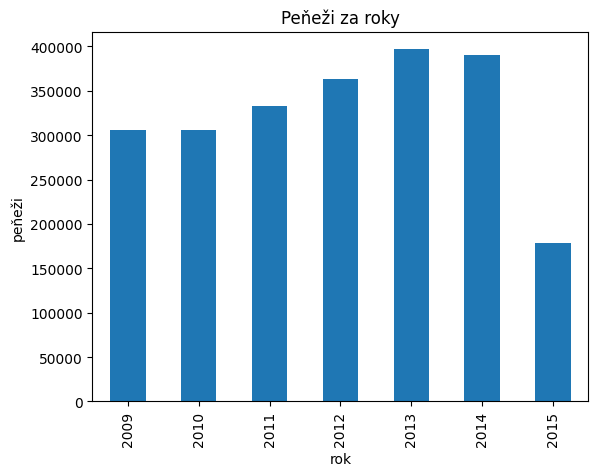

In [13]:
# tak kolko?
df.groupby( df['dt'].dt.year )['fare'].sum().plot(kind='bar', title='Peňeži za roky', xlabel='rok', ylabel='peňeži')

3. V ktorom mesiaci v roku 2013 bolo najviac jázd?

In [14]:
# tak v ktorom?
filter_2013 = df['dt'].dt.year == 2013
df_2013 = df.loc[ filter_2013, : ] 
df_2013.groupby( df_2013['dt'].dt.month )['fare'].count().nlargest(1)

dt
3    2808
Name: fare, dtype: int64

4. V ktorom mesiaci v roku 2014 bolo najviac jázd?

In [15]:
# tak v ktorom?


5. V ktorý deň za uvedené obdobie bolo prevezných najviac pasažierov?

In [16]:
# tak v ktorý?
df.groupby( df['dt'].dt.date )['passengers'].sum().nlargest(1)

dt
2011-11-19    229
Name: passengers, dtype: uint8